In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pingouin as pg
from os.path import join

/Users/b1064537/anaconda3/lib/python3.6/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [4]:
df_TRF1 = pd.read_csv('./data/TRFeffect_50.csv')
df_TRF1_part = df_TRF1.loc[:, ["Subject", "original", "7-chan", "5-chan", "3-chan", "2-chan", "1-chan"]]
df_TRF1_long = df_TRF1_part.melt(id_vars=['Subject'])

In [5]:
df_TRF2 = pd.read_csv('./data/TRFeffect_200.csv')
df_TRF2_part = df_TRF2.loc[:, ["Subject", "original", "7-chan", "5-chan", "3-chan", "2-chan", "1-chan"]]
df_TRF2_long = df_TRF2_part.melt(id_vars=['Subject'])

In [6]:
df_TRF3 = pd.read_csv('./data/TRFeffect_350.csv')
df_TRF3_part = df_TRF3.loc[:, ["Subject", "original", "7-chan", "5-chan", "3-chan", "2-chan", "1-chan"]]
df_TRF3_long = df_TRF3_part.melt(id_vars=['Subject'])

In [7]:
df_reconstr = pd.read_csv('./data/reconstr_acc.csv')
df_reconstr_part = df_reconstr.loc[:, ["Subject", "original", "7-chan", "5-chan", "3-chan", "2-chan", "1-chan"]]
df_reconstr_long = df_reconstr_part.melt(id_vars=['Subject'])

In [8]:
df_coh = pd.read_csv('./data/coherence_2_7_Hz.csv')
df_coh_part = df_coh.loc[:, ["Subject", "original", "7-chan", "5-chan", "3-chan", "2-chan", "1-chan"]]
df_coh_long = df_coh_part.melt(id_vars=['Subject'])

In [9]:
path_fooof = './data/fooof'

In [10]:
# fooof - band width
filename = 'df_bw_tidy.csv'
df_bw = pd.read_csv(join(path_fooof, filename))
df_bw_long = df_bw.loc[:, ["Subject", "variable", "value"]]

In [11]:
# fooof - center frequency
filename = 'df_cf_tidy.csv'
df_cf = pd.read_csv(join(path_fooof, filename))
df_cf_long = df_cf.loc[:, ["Subject", "variable", "value"]]

In [12]:
# fooof - relative peak
filename = 'df_pow_tidy.csv'
df_pow = pd.read_csv(join(path_fooof, filename))
df_pow_long = df_pow.loc[:, ["Subject", "variable", "value"]]

In [13]:
# fooof - exponent
filename = 'df_exp_tidy.csv'
df_exp = pd.read_csv(join(path_fooof, filename))
df_exp_long = df_exp.loc[:, ["Subject", "variable", "value"]]

In [14]:
# fooof - offset
filename = 'df_off_tidy.csv'
df_off = pd.read_csv(join(path_fooof, filename))
df_off_long = df_off.loc[:, ["Subject", "variable", "value"]]

In [15]:
# correlation of TRF50 and coherence
df_TRF1_coh = pd.merge(df_TRF1_long, df_coh_long, on=('Subject', 'variable'))#
corr_TRF1_coh = pg.rm_corr(data=df_TRF1_coh, x='value_x', y='value_y', subject='Subject')
corr_TRF1_coh

r  dof      pval          CI95%     power
rm_corr -0.355372  119  0.000063  [-0.5, -0.19]  0.981753

In [16]:
# correlation of TRF200 and coherence
df_TRF2_coh = pd.merge(df_TRF2_long, df_coh_long, on=('Subject', 'variable'))#
corr_TRF2_coh = pg.rm_corr(data=df_TRF2_coh, x='value_x', y='value_y', subject='Subject')
corr_TRF2_coh

r  dof          pval         CI95%     power
rm_corr  0.489542  119  1.210527e-08  [0.34, 0.61]  0.999947

In [17]:
# correlation of TRF350 and coherence
df_TRF3_coh = pd.merge(df_TRF3_long, df_coh_long, on=('Subject', 'variable'))
corr_TRF3_coh = pg.rm_corr(data=df_TRF3_coh, x='value_x', y='value_y', subject='Subject')
corr_TRF3_coh

r  dof      pval          CI95%     power
rm_corr -0.14017  119  0.125165  [-0.31, 0.04]  0.336739

In [69]:
# correlation of TRF50 and reconstruction accuracy
df_TRF1_reconstr = pd.merge(df_TRF1_long, df_reconstr_long, on=('Subject', 'variable'))
corr_TRF1_reconstr = pg.rm_corr(data=df_TRF1_reconstr, x='value_x', y='value_y', subject='Subject')
corr_TRF1_reconstr

r  dof      pval          CI95%     power
rm_corr  0.035194  119  0.701545  [-0.14, 0.21]  0.066903

In [70]:
# correlation of TRF200 and reconstruction accuracy
df_TRF2_reconstr = pd.merge(df_TRF2_long, df_reconstr_long, on=('Subject', 'variable'))
corr_TRF2_reconstr = pg.rm_corr(data=df_TRF2_reconstr, x='value_x', y='value_y', subject='Subject')
corr_TRF2_reconstr

r  dof      pval         CI95%     power
rm_corr  0.403603  119  0.000004  [0.24, 0.54]  0.996593

In [71]:
# correlation of TRF350 and reconstruction accuracy
df_TRF3_reconstr = pd.merge(df_TRF3_long, df_reconstr_long, on=('Subject', 'variable'))
corr_TRF3_reconstr = pg.rm_corr(data=df_TRF3_reconstr, x='value_x', y='value_y', subject='Subject')
corr_TRF3_reconstr

r  dof      pval          CI95%     power
rm_corr -0.002759  119  0.976038  [-0.18, 0.18]  0.049972

In [66]:
# correlation of TRF50 and band width
df_TRF1_bw = pd.merge(df_TRF1_long, df_bw_long, on=('Subject', 'variable'))
corr_TRF1_bw = pg.rm_corr(data=df_TRF1_bw, x='value_x', y='value_y', subject='Subject')
corr_TRF1_bw

r  dof      pval          CI95%     power
rm_corr -0.089182  119  0.330672  [-0.26, 0.09]  0.163798

In [67]:
# correlation of TRF200 and band width
df_TRF2_bw = pd.merge(df_TRF2_long, df_bw_long, on=('Subject', 'variable'))
corr_TRF2_bw = pg.rm_corr(data=df_TRF2_bw, x='value_x', y='value_y', subject='Subject')
corr_TRF2_bw

r  dof      pval          CI95%     power
rm_corr  0.051452  119  0.575158  [-0.13, 0.23]  0.086674

In [68]:
# correlation of TRF350 and band width
df_TRF3_bw = pd.merge(df_TRF3_long, df_bw_long, on=('Subject', 'variable'))
corr_TRF3_bw = pg.rm_corr(data=df_TRF3_bw, x='value_x', y='value_y', subject='Subject')
corr_TRF3_bw

r  dof      pval          CI95%     power
rm_corr -0.102734  119  0.262155  [-0.28, 0.08]  0.202448

In [53]:
# correlation of TRF50 and center frequency
df_TRF1_cf = pd.merge(df_TRF1_long, df_cf_long, on=('Subject', 'variable')) #
corr_TRF1_cf = pg.rm_corr(data=df_TRF1_cf, x='value_x', y='value_y', subject='Subject')
corr_TRF1_cf

r  dof      pval         CI95%     power
rm_corr  0.41793  119  0.000002  [0.26, 0.56]  0.998097

In [54]:
# correlation of TRF200 and center frequency
df_TRF2_cf = pd.merge(df_TRF2_long, df_cf_long, on=('Subject', 'variable')) ##
corr_TRF2_cf = pg.rm_corr(data=df_TRF2_cf, x='value_x', y='value_y', subject='Subject')
corr_TRF2_cf

r  dof      pval           CI95%     power
rm_corr -0.379781  119  0.000017  [-0.52, -0.22]  0.991782

In [55]:
# correlation of TRF350 and center frequency
df_TRF3_cf = pd.merge(df_TRF3_long, df_cf_long, on=('Subject', 'variable')) 
corr_TRF3_cf = pg.rm_corr(data=df_TRF3_cf, x='value_x', y='value_y', subject='Subject')
corr_TRF3_cf

r  dof      pval         CI95%     power
rm_corr  0.197424  119  0.029966  [0.02, 0.36]  0.587452

In [56]:
# correlation of TRF50 and relative peak
df_TRF1_pow = pd.merge(df_TRF1_long, df_pow_long, on=('Subject', 'variable')) 
corr_TRF1_pow = pg.rm_corr(data=df_TRF1_pow, x='value_x', y='value_y', subject='Subject')
corr_TRF1_pow

r  dof      pval         CI95%     power
rm_corr  0.077155  119  0.400264  [-0.1, 0.25]  0.134344

In [57]:
# correlation of TRF200 and relative peak
df_TRF2_pow = pd.merge(df_TRF2_long, df_pow_long, on=('Subject', 'variable')) 
corr_TRF2_pow=pg.rm_corr(data=df_TRF2_pow, x='value_x', y='value_y', subject='Subject')
corr_TRF2_pow

r  dof      pval          CI95%     power
rm_corr  0.050291  119  0.583829  [-0.13, 0.23]  0.085001

In [58]:
# correlation of TRF350 and relative peak
df_TRF3_pow = pd.merge(df_TRF3_long, df_pow_long, on=('Subject', 'variable')) 
corr_TRF3_pow = pg.rm_corr(data=df_TRF3_pow, x='value_x', y='value_y', subject='Subject')
corr_TRF3_pow

r  dof      pval         CI95%     power
rm_corr  0.02534  119  0.782631  [-0.15, 0.2]  0.058656

In [59]:
# correlation of TRF50 and exponent
df_TRF1_exp = pd.merge(df_TRF1_long, df_exp_long, on=('Subject', 'variable')) 
corr_TRF1_exp = pg.rm_corr(data=df_TRF1_exp, x='value_x', y='value_y', subject='Subject')
corr_TRF1_exp

r  dof      pval          CI95%     power
rm_corr -0.238414  119  0.008453  [-0.4, -0.06]  0.755017

In [60]:
# correlation of TRF200 and exponent
df_TRF2_exp = pd.merge(df_TRF2_long, df_exp_long, on=('Subject', 'variable')) ##
corr_TRF2_exp = pg.rm_corr(data=df_TRF2_exp, x='value_x', y='value_y', subject='Subject')
corr_TRF2_exp

r  dof      pval         CI95%     power
rm_corr  0.415957  119  0.000002  [0.26, 0.55]  0.997933

In [61]:
# correlation of TRF350 and exponent
df_TRF3_exp = pd.merge(df_TRF3_long, df_exp_long, on=('Subject', 'variable')) 
corr_TRF3_exp = pg.rm_corr(data=df_TRF3_exp, x='value_x', y='value_y', subject='Subject')
corr_TRF3_exp

r  dof      pval           CI95%     power
rm_corr -0.213412  119  0.018758  [-0.38, -0.04]  0.656534

In [62]:
# correlation of TRF50 and offset
df_TRF1_off = pd.merge(df_TRF1_long, df_off_long, on=('Subject', 'variable')) 
corr_TRF1_off = pg.rm_corr(data=df_TRF1_off, x='value_x', y='value_y', subject='Subject')
corr_TRF1_off

r  dof      pval           CI95%     power
rm_corr -0.295337  119  0.001007  [-0.45, -0.12]  0.912918

In [63]:
# correlation of TRF200 and offset
df_TRF2_off = pd.merge(df_TRF2_long, df_off_long, on=('Subject', 'variable')) ##
corr_TRF2_off = pg.rm_corr(data=df_TRF2_off, x='value_x', y='value_y', subject='Subject')
corr_TRF2_off

r  dof          pval        CI95%     power
rm_corr  0.471272  119  4.878236e-08  [0.32, 0.6]  0.999852

In [64]:
# correlation of TRF350 and offset
df_TRF3_off = pd.merge(df_TRF3_long, df_off_long, on=('Subject', 'variable')) 
corr_TRF3_off = pg.rm_corr(data=df_TRF3_off, x='value_x', y='value_y', subject='Subject')
corr_TRF3_off

r  dof      pval           CI95%     power
rm_corr -0.208315  119  0.021854  [-0.37, -0.03]  0.634899

## Correlation among behavior, fooof, & TRF

In [40]:
# only 16 of 24 participants' behavioral data were available
# indices for the corresponding participant
ind = np.array([0,1,2,4,5,6,9,11,12,13,15,16,17,19,21,23])
all_ind = np.hstack([ind, ind+24, ind+24*2, ind+24*3, ind+24*4, ind+24*5]) # 6 conditions

In [74]:
df_behav = pd.read_csv('./data/behav_inc_MEG_16.csv')
df_behav_part = df_behav.loc[:, ["Subject", "original", "7-chan", "5-chan", "3-chan", "2-chan", "1-chan"]]
df_behav_long = df_behav_part.melt(id_vars=['Subject'])

In [42]:
df_bw_long_16 = df_bw_long.iloc[all_ind, 0:3]
df_bw_long_16.index = np.arange(0,96)
df_behav_bw = df_behav_long.join(df_bw_long_16["value"], lsuffix='_x', rsuffix='_y')
corr_behav_bw = pg.rm_corr(data=df_behav_bw, x='value_x', y='value_y', subject='Subject')
corr_behav_bw

r  dof      pval         CI95%     power
rm_corr -0.091072   79  0.418749  [-0.3, 0.13]  0.127836

In [43]:
df_cf_long_16 = df_cf_long.iloc[all_ind, 0:3]
df_cf_long_16.index = np.arange(0,96)
df_behav_cf = df_behav_long.join(df_cf_long_16["value"], lsuffix='_x', rsuffix='_y')
corr_behav_cf = pg.rm_corr(data=df_behav_cf, x='value_x', y='value_y', subject='Subject')
corr_behav_cf

r  dof      pval           CI95%    power
rm_corr -0.498626   79  0.000002  [-0.65, -0.31]  0.99814

In [44]:
df_pow_long_16 = df_pow_long.iloc[all_ind, 0:3]
df_pow_long_16.index = np.arange(0,96)
df_behav_pow = df_behav_long.join(df_pow_long_16["value"], lsuffix='_x', rsuffix='_y')
corr_behav_pow = pg.rm_corr(data=df_behav_pow, x='value_x', y='value_y', subject='Subject')
corr_behav_pow

r  dof     pval        CI95%     power
rm_corr  0.222044   79  0.04634  [0.0, 0.42]  0.517931

In [45]:
df_exp_long_16 = df_exp_long.iloc[all_ind, 0:3]
df_exp_long_16.index = np.arange(0,96)
df_behav_exp = df_behav_long.join(df_exp_long_16["value"], lsuffix='_x', rsuffix='_y')
corr_behav_exp = pg.rm_corr(data=df_behav_exp, x='value_x', y='value_y', subject='Subject')
corr_behav_exp

r  dof          pval         CI95%     power
rm_corr  0.601006   79  2.989098e-09  [0.44, 0.72]  0.999987

In [46]:
df_off_long_16 = df_off_long.iloc[all_ind, 0:3]
df_off_long_16.index = np.arange(0,96)
df_behav_off = df_behav_long.join(df_off_long_16["value"], lsuffix='_x', rsuffix='_y')
corr_behav_off = pg.rm_corr(data=df_behav_off, x='value_x', y='value_y', subject='Subject')
corr_behav_off

r  dof          pval         CI95%  power
rm_corr  0.662402   79  1.640173e-11  [0.52, 0.77]    1.0

In [47]:
df_TRF1_part = df_TRF1.iloc[ind, 0:7]
df_TRF1_long_16 = df_TRF1_part.melt(id_vars=['Subject'])
df_behav_TRF1 = df_behav_long.join(df_TRF1_long_16["value"], lsuffix='_x', rsuffix='_y') 
corr_behav_TRF1 = pg.rm_corr(data=df_behav_TRF1, x='value_x', y='value_y', subject='Subject')
corr_behav_TRF1

r  dof      pval           CI95%     power
rm_corr -0.241361   79  0.029955  [-0.44, -0.02]  0.589503

In [48]:
df_TRF2_part = df_TRF2.iloc[ind, 0:7]
df_TRF2_long_16 = df_TRF2_part.melt(id_vars=['Subject'])
df_behav_TRF2 = df_behav_long.join(df_TRF2_long_16["value"], lsuffix='_x', rsuffix='_y') 
corr_behav_TRF2 = pg.rm_corr(data=df_behav_TRF2, x='value_x', y='value_y', subject='Subject')
corr_behav_TRF2

r  dof          pval         CI95%     power
rm_corr  0.523706   79  5.249442e-07  [0.34, 0.67]  0.999318

In [49]:
df_TRF3_part = df_TRF3.iloc[ind, 0:7]
df_TRF3_long_16 = df_TRF3_part.melt(id_vars=['Subject'])
df_behav_TRF3 = df_behav_long.join(df_TRF3_long_16["value"], lsuffix='_x', rsuffix='_y') 
corr_behav_TRF3 = pg.rm_corr(data=df_behav_TRF3, x='value_x', y='value_y', subject='Subject')
corr_behav_TRF3

r  dof      pval         CI95%     power
rm_corr -0.015944   79  0.887652  [-0.23, 0.2]  0.052102

In [50]:
df_reconstr_part = df_reconstr.iloc[ind, 0:7]
df_reconstr_long_16 = df_reconstr_part.melt(id_vars=['Subject'])
df_behav_reconstr = df_behav_long.join(df_reconstr_long_16["value"], lsuffix='_x', rsuffix='_y') 
corr_behav_reconstr = pg.rm_corr(data=df_behav_reconstr, x='value_x', y='value_y', subject='Subject')
corr_behav_reconstr

r  dof          pval         CI95%     power
rm_corr  0.51808   79  7.285002e-07  [0.34, 0.66]  0.999137

In [51]:
df_coh_part = df_coh.iloc[ind, 0:7]
df_coh_long_16 = df_coh_part.melt(id_vars=['Subject'])
df_behav_coh = df_behav_long.join(df_coh_long_16["value"], lsuffix='_x', rsuffix='_y') 
corr_behav_coh = pg.rm_corr(data=df_behav_coh, x='value_x', y='value_y', subject='Subject')
corr_behav_coh

r  dof          pval         CI95%  power
rm_corr  0.675674   79  4.519763e-12  [0.54, 0.78]    1.0

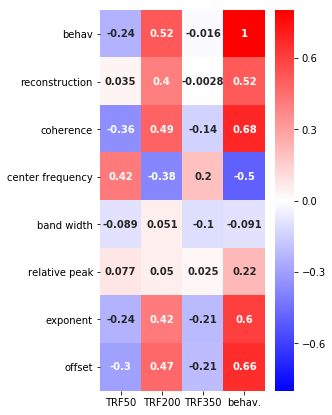

In [73]:
rm_corr =  {'TRF50':[corr_behav_TRF1.r.rm_corr, corr_TRF1_reconstr.r.rm_corr, corr_TRF1_coh.r.rm_corr, corr_TRF1_cf.r.rm_corr, corr_TRF1_bw.r.rm_corr, corr_TRF1_pow.r.rm_corr, corr_TRF1_exp.r.rm_corr, corr_TRF1_off.r.rm_corr],
           'TRF200':[corr_behav_TRF2.r.rm_corr, corr_TRF2_reconstr.r.rm_corr, corr_TRF2_coh.r.rm_corr, corr_TRF2_cf.r.rm_corr, corr_TRF2_bw.r.rm_corr, corr_TRF2_pow.r.rm_corr, corr_TRF2_exp.r.rm_corr, corr_TRF2_off.r.rm_corr],
           'TRF350':[corr_behav_TRF3.r.rm_corr, corr_TRF3_reconstr.r.rm_corr, corr_TRF3_coh.r.rm_corr, corr_TRF3_cf.r.rm_corr, corr_TRF3_bw.r.rm_corr,corr_TRF3_pow.r.rm_corr, corr_TRF3_exp.r.rm_corr, corr_TRF3_off.r.rm_corr],
           'behav.':[1, corr_behav_reconstr.r.rm_corr, corr_behav_coh.r.rm_corr, corr_behav_cf.r.rm_corr, corr_behav_bw.r.rm_corr, corr_behav_pow.r.rm_corr, corr_behav_exp.r.rm_corr, corr_behav_off.r.rm_corr]}
var_list = ['behav', 'reconstruction', 'coherence','center frequency','band width','relative peak','exponent','offset']
df_rm_corr = pd.DataFrame(data=rm_corr, index=var_list)
plt.figure(figsize = (3.7,7))
g = sns.heatmap(df_rm_corr,
              vmin=-0.8,
              vmax=0.8,
              cmap='bwr',
              annot=True,
            annot_kws={'weight':'bold'}) # 'size':12,
g.figure.savefig("./plot/corr_fooof_TRF.svg", bbox_inches='tight')
#g.figure.savefig(join(path_fooof, "corr_fooof_TRF.svg"), bbox_inches='tight')